# <center> LAb 6b: NCA, LDA and PCA with Kernels functions<br> Kernel Principal Components Analysis (KPCA)<br>Kernel Linear Discriminant Analysis(KLDA)<br> <small>Réda DEHAK<br> 25 june 2021</small> </center>

The goal of this lab is :

    - Reproduce the result of this scientific paper about NCA: 
[J. Goldberger, G. Hinton, S. Roweis, R. Salakhutdinov, "Neighbourhood Components Analysis", Advances in Neural Information Processing Systems, vol 17, pp. 513-520, 2005.](https://www.cs.toronto.edu/~hinton/absps/nca.pdf)
    
     - Test and use KPCA and KLDA:
[S. Mika, G. Rätsch,J. Weston,B. Schölkopf, KR. Müller, "Fisher discriminant analysis with kernels", Neural Networks for Signal Processing, vol IX. pp. 41–48, 1999.](https://doc.ml.tu-berlin.de/publications/publications/MikRaeWesSchMue99.pdf)
    
    
We will use the [optdigits dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/) from UCI. This database is a small set of handwritten digits compared to the MNIST databases. A preprocessing program available by NIST was used to extract 64 features which represent the number of on pixel of nonoverlapping blocks of 4x4 extracted from normalized image. [See](optdigits.names.txt) for more details.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadData(trainfile, testfile):
    dataTrain = pd.read_csv(trainfile, header=None)
    dataTest = pd.read_csv(testfile, header=None)

    Xtrain = dataTrain.values[:,0:-1]
    ytrain = dataTrain.values[:,-1]

    Xtest = dataTest.values[:,0:-1]
    ytest = dataTest.values[:,-1]
    
    return(Xtrain, ytrain, Xtest, ytest)

### Part 1: Neighborhood Components Analysis (NCA)

1- Load circles, wines, spiral and optdigits dataset

In [4]:
datawines = loadData('wine.tra', 'wine.tes')
datacircles = loadData('circles.tra', 'circles.tes')
dataspiral = loadData('spiral.tra', 'spiral.tes')
dataoptdigit = loadData('optdigits.tra', 'optdigits.tes')

In [5]:
Datas = [('Circles', datacircles), ('Wines', datawines),  ('Optdigits', dataoptdigit)]

2- Train a KNN classifier on training data, and compute the performance on test data using different values of k.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,10):
    neigh = KNeighborsClassifier(n_neighbors=i)
    for data in Datas:
        name, d = data
        Xtrain, ytrain, Xtest, ytest = d
        neigh.fit(Xtrain,ytrain)
        print('Dataset : ', name, 'k= ',i,'score: ',neigh.score(Xtest,ytest))

Dataset :  Circles k=  1 score:  1.0
Dataset :  Wines k=  1 score:  0.7777777777777778
Dataset :  Optdigits k=  1 score:  0.9799666110183639
Dataset :  Circles k=  2 score:  1.0
Dataset :  Wines k=  2 score:  0.75
Dataset :  Optdigits k=  2 score:  0.9738452977184195
Dataset :  Circles k=  3 score:  1.0
Dataset :  Wines k=  3 score:  0.7777777777777778
Dataset :  Optdigits k=  3 score:  0.9782971619365609
Dataset :  Circles k=  4 score:  1.0
Dataset :  Wines k=  4 score:  0.7222222222222222
Dataset :  Optdigits k=  4 score:  0.9760712298274903
Dataset :  Circles k=  5 score:  1.0
Dataset :  Wines k=  5 score:  0.75
Dataset :  Optdigits k=  5 score:  0.9788536449638287
Dataset :  Circles k=  6 score:  1.0
Dataset :  Wines k=  6 score:  0.8055555555555556
Dataset :  Optdigits k=  6 score:  0.9777406789092933
Dataset :  Circles k=  7 score:  1.0
Dataset :  Wines k=  7 score:  0.7777777777777778
Dataset :  Optdigits k=  7 score:  0.9766277128547579
Dataset :  Circles k=  8 score:  1.0
Data

3- try to compare the result of PCA, LDA and NCA on these data. Plot the projection of test data using PCA, LDA and NCA into two first axis.

In [10]:
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pca = PCA(n_components=2)
lda = LinearDiscriminantAnalysis(n_components=2)
nca = NeighborhoodComponentsAnalysis(n_components=2)
Classifiers = [('PCA', pca), ('LDA', lda), ('NCA', nca)]

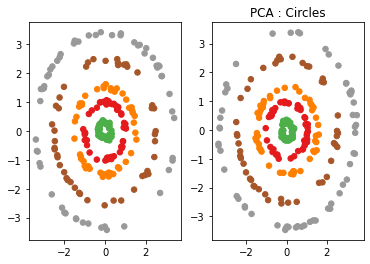

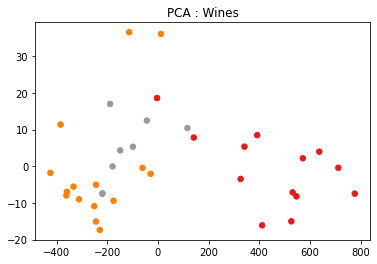

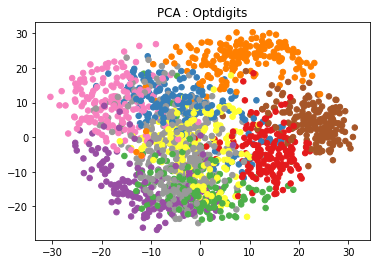

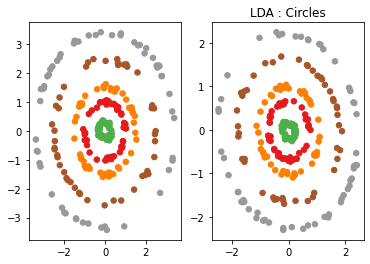

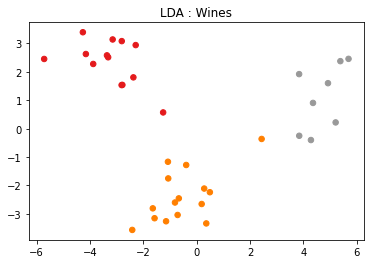

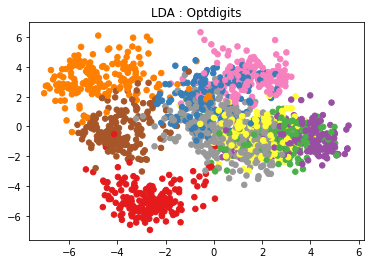

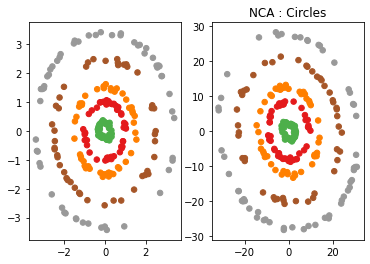

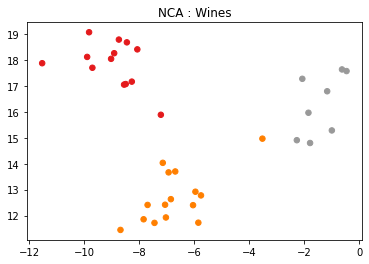

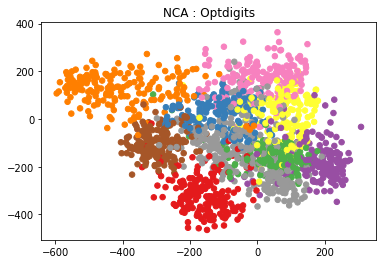

In [15]:
for n, classifier in Classifiers: 
    for i, (namedata, data) in enumerate(Datas):
        classifier.fit(data[0], data[1])
        datatrans = classifier.transform(data[2])
        plt.figure()
        if(namedata == "Two Circles" or namedata == 'Spiral' or namedata == 'Circles'):
            plt.subplot(1,2,1)
            plt.scatter(data[2][:, 0], data[2][:, 1], c=data[3], s=30, cmap='Set1')
            plt.subplot(1,2,2)
        plt.scatter(datatrans[:, 0], datatrans[:, 1], c=data[3], s=30, cmap='Set1')
        plt.title("{} : {}".format(n, namedata))

4- Train a KNN classifier on training data, and compute the performance on test data using a PCA, LDA, NCA.

In [17]:
for i, (name, model) in enumerate(Classifiers):
    for (named, d) in Datas:
        Xtrain = model.fit_transform(d[0], d[1])
        ytrain = d[1]
        Xtest = model.transform(d[2])
        ytest = d[3]
        neigh = KNeighborsClassifier(n_neighbors=1)
        neigh.fit(Xtrain,ytrain)
        print(name, 'dataset :', named, ' Knn with k = 1 ','score: ',neigh.score(Xtest,ytest))

PCA dataset : Circles  Knn with k = 1  score:  1.0
PCA dataset : Wines  Knn with k = 1  score:  0.75
PCA dataset : Optdigits  Knn with k = 1  score:  0.528658875904285
LDA dataset : Circles  Knn with k = 1  score:  1.0
LDA dataset : Wines  Knn with k = 1  score:  0.9722222222222222
LDA dataset : Optdigits  Knn with k = 1  score:  0.5904284919309961
NCA dataset : Circles  Knn with k = 1  score:  1.0
NCA dataset : Wines  Knn with k = 1  score:  0.9722222222222222
NCA dataset : Optdigits  Knn with k = 1  score:  0.6549805230940456


5- Conclude, How to improve the performances of these methods (show an example)?

### Part 2: Nolinear dimension reduction (Kernel Methods)

- Train a KPCA with linear kernel and compare the result to the classical PCA

In [1]:
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel, linear_kernel
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

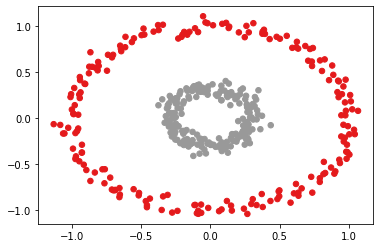

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='Set1')

In [34]:
def GramMatrix(X1, X2, kernel):
    N = len(X1)
    M = len(X2)
    G = np.zeros((N, M))
    for i in range(N):
        for j in range (M):
            G[i, j] = kernel(X1[i].reshape((-1,1)), X2[j].reshape((-1,1)))
    
    return G;

class KernelPCA:
    def __init__(self, kernel=lambda x,y: x.T @ y):
        self.k = kernel
        
    def fit(self, X):
        N = len(X)
        d = X.shape[1]
        Gram = GramMatrix(X, X, kernel = self.k)
        B = (np.eye(N) - np.ones((N, N)) / N).T @ Gram @ (np.eye(N) - np.ones((N, N)) / N)
        D, V = np.linalg.eigh(B)
        D = D[::-1]
        self.eigv = D[0:d]
        V = V[:, ::-1]
        self.Vhat = V[:, 0:d] @ np.diag(1 / np.sqrt(D[0:d]))
        self.SV = X
        return self
        
    def transform(self, X):
        g = GramMatrix(X, self.SV, kernel = self.k)
        G = GramMatrix(self.SV, self.SV, kernel = self.k)
        return g @ self.Vhat - np.mean(G, axis=0, keepdims=True) @ self.Vhat
    

- Test the result with polynomial and RBF kernels

In [35]:
KPCA = KernelPCA().fit(X)

In [36]:
KPCA.eigv

array([112.64467231, 110.34066072])

In [37]:
print(KPCA.transform(X[0:2, :]))

[[ 0.59436617 -0.85034355]
 [ 0.81353657  0.4914639 ]]


In [27]:
from sklearn.decomposition import PCA

trans = PCA(n_components=2).fit(X)
print(trans.singular_values_ ** 2)

[112.64467231 110.34066072]


In [38]:
print(trans.transform(X[0:2, :]))

[[ 0.59436617 -0.85034355]
 [ 0.81353657  0.4914639 ]]


- Write a function that fit a KLDA on the X dataset, use the kernel function as a parameter.

- Train a KLDA with linear kernel and compare the result to the classical LDA

- Try to use a KPCA of the optdigit data (use different kernel functions)
- Plot each example of the testing data in the first two factorial axis of PCA(2D space), use different color foreach classe? compare with the classical PCA, what did you conclude?

- Train a KNN on the projected data into the $d$ first factorial axis of KPCA, and test the performances on the testing data? try different values of $d$ and $k$?  

We will try a Kernel Linear Discriminant Analysis method to separate the 10 classes. Train a Kernel Linear Discriminant Analysis on the training data and plot each example in the 2d plan corresponding to the two axis with largest eigen values? what did you conclude? (use different kernel functions)

Train a KNN on the projected data into the $d$ first axis of KLDA and test the performances on the testing data? try different values of $d$ and $k$?

Compare the performances of the KNN with PCA, LDA, NCA, KPCA and KLDA?